In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import sql

# pandas formatting
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 200)

In [2]:
# import tables
documents = sql("SELECT * FROM csas2_document")
tracking = sql("SELECT * FROM csas2_documenttracking")

In [3]:
documents

,id,created_at,updated_at,title_en,title_fr,title_iku,pub_number,pages_en,status,old_id,created_by_id,process_id,updated_by_id,url_en,url_fr,dev_link_en,dev_link_fr,ekme_gcdocs_en,ekme_gcdocs_fr,cat_number_en,cat_number_fr,document_type_id,translation_status,pub_number_request_date,due_date,is_confirmed,lead_office_id,pages_fr,pdf_size_kb_en,pdf_size_kb_fr,cat_number_iku,library_link_en,library_link_fr,library_link_iku,pdf_size_kb_iku,isbn_en,isbn_fr,isbn_iku,pages_iku,ekme_gcdocs_iku,pub_number_assigned_date,posting_notification_sent_date,has_data_links,has_third_language,third_language,urgency_notes,urgent,media_attention,sharepoint_archive_en,sharepoint_archive_fr
0,1,2021-04-28 16:25:45.797474,2023-04-14 19:25:46.163486,REFERENCE POINTS FOR STRIPED BASS (MORONE SAXATILIS) FOR THE SOUTHERN GULF OF ST. LAWRENCE POPULATION,POINTS DE RÉFÉRENCE POUR LA POPULATION DE BAR RAYÉ (MORONE SAXATILIS) DU SUD DU GOLFE DU SAINT-LAURENT,None,2021/018,33.0,17,9600.0,292,2,2858.0,http://www.dfo-mpo.gc.ca/csas-sccs/Publications/SAR-AS/2021/2021_018-eng.html,http://www.dfo-mpo.gc.ca/csas-sccs/Publications/SAR-AS/2021/2021_018-fra.html,None,None,4229849,4229850,Fs70-6/2021-018E-PDF,Fs70-6/2021-018F-PDF,2,2,2021-05-05 15:05:22.039175,2021-01-20 16:00:00,1,1.0,37.0,1352.0,1198.0,None,None,None,None,NaN,978-0-660-38600-3,978-0-660-38601-0,None,NaN,None,2023-04-14 19:25:46.160856,NaT,NaN,NaN,Inuktitut,None,NaN,NaN,None,None
1,2,2021-04-28 18:07:12.224680,2023-11-09 19:16:33.335023,"Review of elements of proponent application to use rotenone for the purpose of eradicating Smallmouth Bass (Micropterus dolomieu) from Miramichi Lake, New Brunswick",Examen des éléments de la demande du promoteur d’utiliser de la roténone dans le but d’éradiquer l’achigan à petite bouche (Micropterus dolomieu) dans le lac Miramichi (Nouveau-Brunswick),None,2019/040,17.0,12,9922.0,292,3,1142.0,https://www.dfo-mpo.gc.ca/csas-sccs/Publications/ScR-RS/2019/2019_040-eng.html,https://www.dfo-mpo.gc.ca/csas-sccs/Publications/ScR-RS/2019/2019_040-fra.html,None,None,4107182,4107189,None,None,5,0,NaT,NaT,1,1.0,20.0,489.0,457.0,None,None,None,None,NaN,None,None,None,NaN,None,2023-11-09 19:15:57.945299,NaT,NaN,NaN,Inuktitut,None,NaN,NaN,None,None
2,3,2021-04-28 18:24:29.520511,2022-05-30 13:31:55.712779,"Review of elements of proponent application to use rotenone for the purpose of eradicating Smallmouth Bass (Micropterus dolomieu) from Miramichi Lake, New Brunswick",Examen des éléments de la demande du promoteur d'utiliser de la roténone dans le but d'éradiquer l'achigan à petite bouche (Micropterus dolomieu) dans le lac Miramichi (Nouveau-Brunswick),None,None,NaN,0,NaN,292,3,50.0,https://www.dfo-mpo.gc.ca/csas-sccs/Schedule-Horraire/2019/09_11-eng.html,https://www.dfo-mpo.gc.ca/csas-sccs/Schedule-Horraire/2019/09_11-fra.html,None,None,None,None,None,None,8,0,NaT,NaT,0,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,NaN,None,NaT,NaT,NaN,NaN,Inuktitut,None,NaN,NaN,None,None
3,4,2021-04-29 11:29:38.915350,2023-04-14 19:25:32.656899,Reference points that conform to the Precautionary Approach for the Striped Bass population of the southern Gulf of St. Lawrence,Points de référence conformes à l'approche de précaution pour la population de bar rayé du sud du golfe du Saint-Laurent,None,None,NaN,0,NaN,292,2,2858.0,https://www.dfo-mpo.gc.ca/csas-sccs/Schedule-Horraire/2020/11_23-25-eng.html,https://www.dfo-mpo.gc.ca/csas-sccs/Schedule-Horraire/2020/11_23-25-fra.html,None,None,None,None,None,None,8,2,NaT,2020-10-12 15:00:00,0,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,NaN,None,NaT,NaT,NaN,NaN,Inuktitut,None,NaN,NaN,None,None
4,7,2021-05-03 17:06:34.094682,2023-04-14 19:24:40.293444,Multi-species Considerations for Defining Fisheries Reference Points for Striped bass (Morone saxatilis) from the Southern Gulf of St. Lawrence,Considérations multi-espèces pour la définition des points de référence des pêches pour le bar rayé (Morone saxatilis) du sud du golfe du Saint-Lauren

In [3]:
status_columns = [
    'submission_date',
    'date_chair_sent',
    'date_chair_appr',
    'date_coordinator_sent',
    'date_coordinator_appr',
    'date_section_head_sent',
    'date_section_head_appr',
    'date_division_manager_sent',
    'date_division_manager_appr',
    'date_director_sent',
    'date_director_appr',
    'date_doc_submitted',
    'date_proof_author_sent',
    'date_proof_author_approved',
    'actual_posting_date',
    # 'updated_posting_date',  # IGNORE updated_posting_date
]

translation_status_columns = [
    'date_translation_sent',
    'date_returned',
    'translation_review_date',
]

In [11]:
def time_matrix(dataframe, col_lst, all_stats=False, quantile=0.5):
    df_temp = dataframe[col_lst].apply(pd.to_datetime, errors='coerce')
    matrix = pd.DataFrame(index=col_lst, columns=col_lst)
    
    for i, from_step in enumerate(col_lst):
        for j, to_step in enumerate(col_lst):
            if i < j:
                if all_stats:
                    matrix.loc[from_step, to_step] = (
                        round((df_temp[to_step] - df_temp[from_step]).dt.days.mean(), 1),
                        round((df_temp[to_step] - df_temp[from_step]).dt.days.quantile([0.025, 0.16, 0.5, 0.84, 0.975]), 1),
                    )
                else:
                    matrix.loc[from_step, to_step] = round((df_temp[to_step] - df_temp[from_step]).dt.days.quantile(quantile), 1)
                
    return matrix.apply(pd.to_numeric, errors='coerce').dropna(how='all').dropna(how='all', axis=1)


In [19]:
submission_steps = ['submission_date', 'date_doc_submitted', 'actual_posting_date']
display(time_matrix(tracking, status_columns, True).T)
display(time_matrix(tracking, translation_status_columns, True).T)
display(time_matrix(tracking, submission_steps, True).T)

,submission_date,date_chair_sent,date_chair_appr,date_coordinator_sent,date_coordinator_appr,date_section_head_sent,date_section_head_appr,date_division_manager_sent,date_division_manager_appr,date_director_sent,date_director_appr,date_doc_submitted,date_proof_author_sent,date_proof_author_approved
date_chair_sent,"(10.4, [-15.4, 0.0, 0.0, 17.0, 164.6])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_chair_appr,"(11.3, [-55.1, 0.0, 3.0, 34.6, 211.9])","(20.2, [0.0, 0.0, 2.0, 20.8, 127.0])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_coordinator_sent,"(33.0, [0.0, 0.0, 3.0, 51.2, 307.8])","(19.7, [-1.3, 0.0, 1.0, 24.7, 128.5])","(15.1, [-66.6, -3.0, 0.0, 12.0, 247.7])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_coordinator_appr,"(51.6, [0.0, 1.0, 20.0, 92.1, 393.4])","(42.7, [0.0, 0.9, 14.5, 75.2, 203.4])","(35.5, [-10.9, 0.0, 6.5, 54.4, 322.2])","(20.6, [0.0, 0.0, 3.0, 34.2, 142.1])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_section_head_sent,"(67.8, [-1.0, 28.2, 46.0, 91.6, 264.9])","(62.9, [0.4, 10.8, 43.0, 83.8, 277.8])","(21.6, [-28.6, 0.0, 9.0, 52.9, 89.6])","(62.1, [0.0, 3.2, 43.0, 93.2, 279.8])","(12.1, [-40.0, -7.9, 0.0, 43.9, 83.6])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_section_head_appr,"(66.5, [4.0, 23.7, 49.0, 91.0, 236.7])","(68.2, [3.4, 19.9, 48.5, 86.0, 273.6])","(40.8, [-12.1, 0.0, 15.0, 65.4, 231.1])","(62.5, [0.0, 9.0, 48.0, 90.0, 251.5])","(14.9, [-27.0, -1.0, 0.0, 42.0, 87.6])","(7.5, [0.0, 0.0, 2.0, 9.9, 43.0])",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_division_manager_sent,"(57.8, [0.0, 2.0, 26.0, 101.0, 368.6])","(41.6, [0.0, 1.0, 19.0, 70.0, 206.5])","(39.2, [-16.8, 0.0, 7.5, 69.8, 215.7])","(33.6, [0.0, 0.0, 9.0, 59.2, 193.5])","(6.2, [-28.0, 0.0, 0.0, 4.1, 80.2])","(5.6, [0.0, 0.0, 0.0, 6.8, 39.3])","(-0.7, [-22.2, -4.9, 0.0, 0.0, 24.7])",NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_division_manager_appr,"(64.1, [1.0, 7.0, 33.0, 105.3, 401.0])","(47.2, [1.0, 5.0, 25.5, 85.0, 184.6])","(48.4, [-3.0, 3.0, 16.5, 81.5, 336.1])","(39.9, [0.0, 3.0, 20.0, 81.2, 188.0])","(13.3, [-8.4, 0.0, 5.0, 22.7, 96.1])","(11.4, [0.0, 0.0, 3.0, 29.4, 52.2])","(4.7, [-1.4, 0.0, 0.0, 6.6, 41.2])","(7.3, [0.0, 0.0, 3.0, 12.7, 35.0])",NaN,NaN,NaN,NaN,NaN,NaN
date_director_sent,"(64.6, [1.0, 8.0, 29.0, 85.5, 420.2])","(45.8, [1.0, 6.0, 27.0, 75.9, 234.3])","(51.9, [0.0, 3.0, 20.0, 66.2, 449.5])","(37.3, [0.0, 1.0, 14.0, 51.0, 145.5])","(27.9, [-0.8, 0.0, 4.0, 27.8, 132.5])","(12.8, [0.0, 0.0, 4.5, 33.5, 50.6])","(4.1, [-5.4, -0.6, 0.0, 5.9, 38.4])","(8.6, [0.0, 0.0, 4.0, 16.7, 37.3])","(2.7, [-8.0, 0.0, 0.0, 4.7, 28.4])",NaN,NaN,NaN,NaN,NaN
date_director_appr,"(66.8, [2.0, 11.0, 35.0, 89.1, 415.0])","(50.2, [1.0, 8.0, 32.0, 82.0, 242.4])","(61.6, [0.0, 5.0, 26.0, 87.0, 459.5])","(41.5, [0.0, 3.0, 16.0, 55.4, 165.6])","(29.4, [0.0, 1.0, 7.0, 35.6, 146.5])","(13.2, [-8.6, 0.0, 6.0, 35.2, 52.6])","(5.7, [-11.1, -0.5, 1.0, 13.0, 37.8])","(11.5, [0.0, 1.0, 7.0, 27.8, 45.9])","(5.8, [-1.0, 0.0, 2.0, 12.0, 30.9])","(2.9, [0.0, 0.0, 1.0, 7.0, 18.0])",NaN,NaN,NaN,NaN


,date_translation_sent,date_returned
date_returned,"(23.7, [6.0, 13.0, 21.0, 34.0, 91.0])",NaN
translation_review_date,"(55.4, [8.2, 16.8, 37.0, 97.2, 190.8])","(40.7, [0.0, 2.0, 12.0, 80.5, 307.8])"


,submission_date,date_doc_submitted
date_doc_submitted,"(118.4, [7.0, 29.0, 72.0, 229.9, 457.3])",NaN
actual_posting_date,"(154.4, [34.6, 63.0, 106.5, 260.8, 490.7])","(-32.6, [6.0, 22.0, 34.0, 69.0, 227.0])"


In [20]:
time_matrix(tracking, status_columns, True).T.iloc[:, 0]

date_chair_sent                   (10.4, [-15.4, 0.0, 0.0, 17.0, 164.6])
date_chair_appr                   (11.3, [-55.1, 0.0, 3.0, 34.6, 211.9])
date_coordinator_sent               (33.0, [0.0, 0.0, 3.0, 51.2, 307.8])
date_coordinator_appr              (51.6, [0.0, 1.0, 20.0, 92.1, 393.4])
date_section_head_sent           (67.8, [-1.0, 28.2, 46.0, 91.6, 264.9])
date_section_head_appr            (66.5, [4.0, 23.7, 49.0, 91.0, 236.7])
date_division_manager_sent        (57.8, [0.0, 2.0, 26.0, 101.0, 368.6])
date_division_manager_appr        (64.1, [1.0, 7.0, 33.0, 105.3, 401.0])
date_director_sent                 (64.6, [1.0, 8.0, 29.0, 85.5, 420.2])
date_director_appr                (66.8, [2.0, 11.0, 35.0, 89.1, 415.0])
date_doc_submitted              (118.4, [7.0, 29.0, 72.0, 229.9, 457.3])
date_proof_author_sent         (147.9, [28.8, 54.3, 97.0, 268.7, 494.2])
date_proof_author_approved     (151.4, [32.2, 54.0, 99.5, 273.1, 500.8])
actual_posting_date           (154.4, [34.6, 63.0, 

In [32]:
def diagonal(dataframe, col_lst, name, quantile=0.5):
    matrix = time_matrix(dataframe, col_lst, quantile=quantile)
    diagonal_values = matrix.values.diagonal()
    labels = [f"{matrix.index[i]} > {matrix.columns[i]}" for i in range(len(diagonal_values))]
    return pd.Series(diagonal_values, index=labels, name=name)

series_50 = diagonal(tracking, status_columns, '50th %ile')
series_75 = diagonal(tracking, status_columns, '75th %ile', 0.75)
series_95 = diagonal(tracking, status_columns, '95th %ile', 0.95)

pd.concat([series_50, series_75, series_95], axis=1)

,50th %ile,75th %ile,95th %ile
submission_date > date_chair_sent,0.0,3.0,112.9
date_chair_sent > date_chair_appr,2.0,13.0,79.3
date_chair_appr > date_coordinator_sent,0.0,4.0,65.1
date_coordinator_sent > date_coordinator_appr,3.0,20.8,87.5
date_coordinator_appr > date_section_head_sent,0.0,29.5,78.2
date_section_head_sent > date_section_head_appr,2.0,5.5,38.9
date_section_head_appr > date_division_manager_sent,0.0,0.0,1.0
date_division_manager_sent > date_division_manager_appr,3.0,8.5,28.3
date_division_manager_appr > date_director_sent,0.0,2.0,26.3
date_director_sent > date_director_appr,1.0,5.0,13.0


In [13]:
def plot_heatmap(dataframe, col_lst, quantile=0.5, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    
    matrix = time_matrix(dataframe, col_lst, quantile=quantile).fillna(-99)
    annot = matrix.map(lambda x: f"{int(x)}" if x >= 0 else "")
    
    fig = sns.heatmap(
        matrix, 
        annot=annot, 
        cmap='Blues',
        vmin=-10,
        vmax=100,
        fmt='', 
        cbar=False
    )
    
    fig.xaxis.set_ticks_position('top')
    fig.tick_params(axis='x', rotation=90, length=0)
    fig.tick_params(axis='x', rotation=90)
    
    plt.show()
    

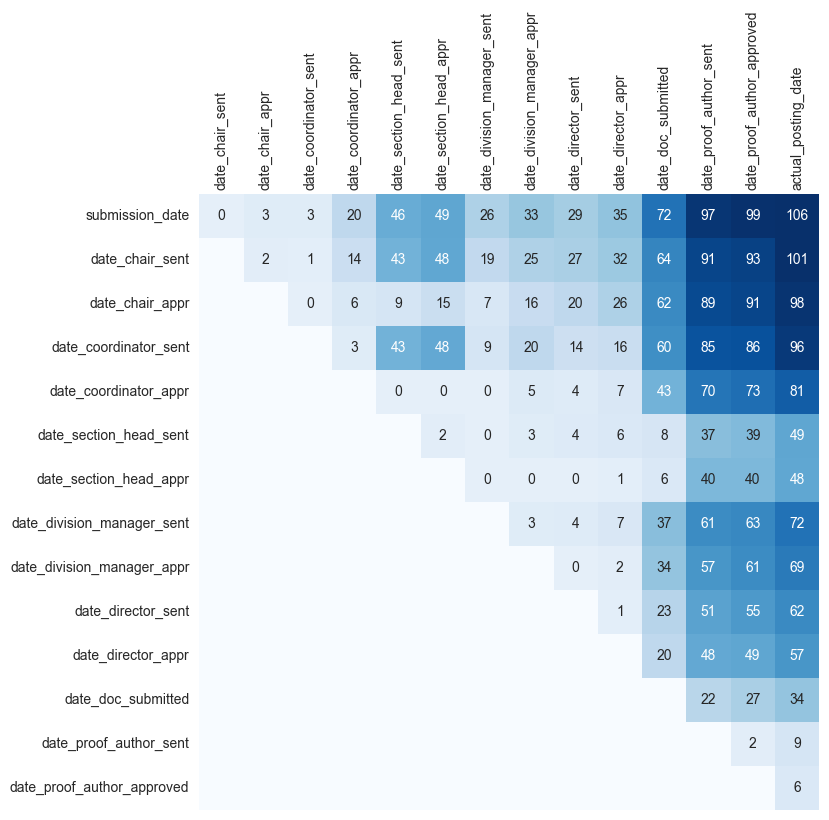

In [14]:
plot_heatmap(tracking, status_columns)

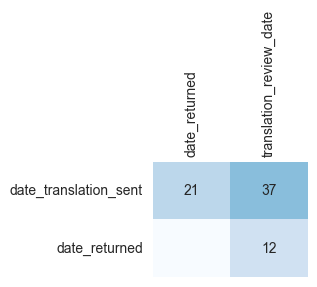

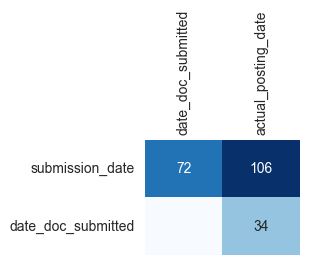

In [15]:
plot_heatmap(tracking, translation_status_columns, figsize=(2,1.5))
plot_heatmap(tracking, submission_steps, figsize=(2,1.5))

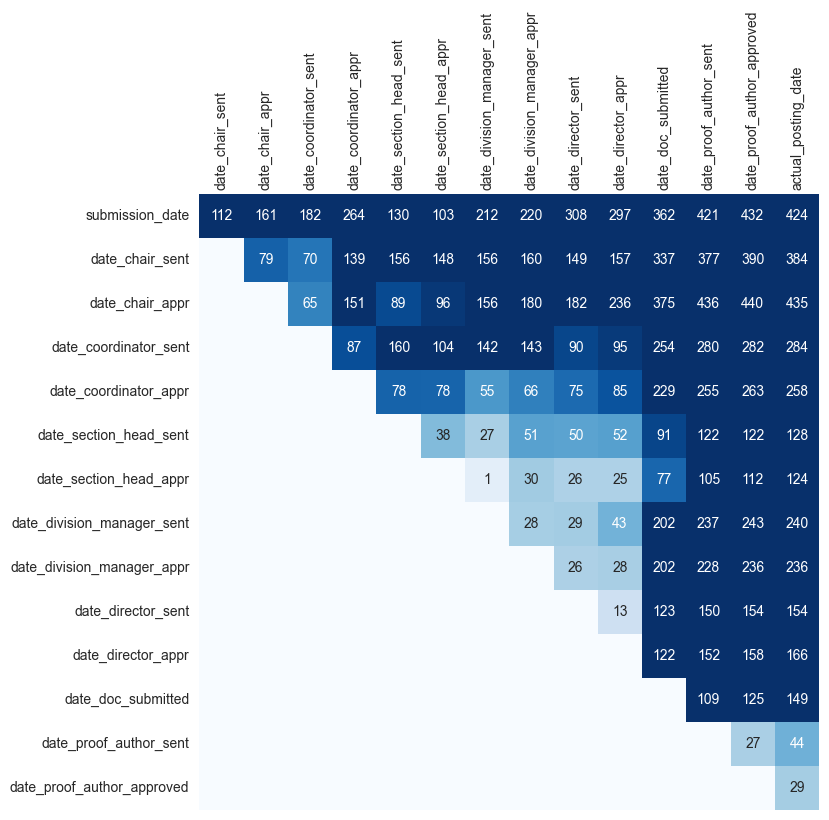

In [16]:
plot_heatmap(tracking, status_columns, quantile=0.95)

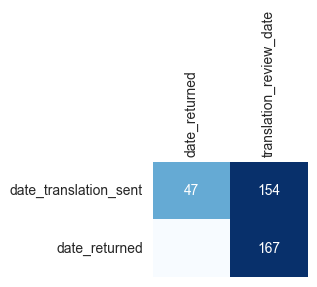

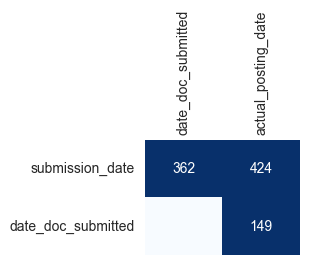

In [17]:
plot_heatmap(tracking, translation_status_columns, figsize=(2,1.5), quantile=0.95)
plot_heatmap(tracking, submission_steps, figsize=(2,1.5), quantile=0.95)